In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

# Question 1

In [2]:
# Read dataset
election_data = pd.read_csv("election_train.csv")
demographic_data = pd.read_csv("demographics_train.csv")
election_data["Votes"] = election_data["Votes"].fillna(0) #Fill in the NaN values in the Votes column with 0's

In [3]:
# Reshape (pivot) dataset A from long format to wide format
election_data_wide = pd.pivot_table(election_data, values = 'Votes', index = ['Year','State', 'County', 'Office'], columns = 'Party').reset_index()
#display(election_data_wide.to_string())
election_data_wide.shape

(1205, 6)

# Question 2

In [4]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593

def f(x):
    return {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Northern Mariana Islands':'MP',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Palau': 'PW',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virgin Islands': 'VI',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'
    }[x]

In [5]:
def g(x):
    x = x.lower()
    if "city" in x:
        return x
    else:
        return x + " county"
    
def h(x): # in election_data only james city has county appended so remove
    if "james city" in x:
        return "james city"
    else:
        return x
    
election_data_wide['County'] = election_data_wide['County'].apply(lambda x: x.lower()) #lowercase everything
election_data_wide['County'] = election_data_wide['County'].apply(lambda x: h(x)) #address datum inconsistency
demographic_data['County'] = demographic_data['County'].apply(lambda x: g(x)) # address county name inconsistency
demographic_data['State'] = demographic_data['State'].apply(lambda x: f(x)) # address state name inconsistency
#print(demographic_data.to_string())

In [6]:
#to merge you will need to get rid of "county" part of string (not column), 
# and maybe convert full names to abreviations or visa-versa
# Merge dataset D1 and dataset D2
merged_data = pd.merge(election_data_wide,demographic_data,how='inner')
merged_data.shape
#display(merged_data.to_string())

(1200, 21)

# Question 3

In [7]:
merged_data.info(verbose=True) #provides the info related to types, etc.
#21 variables
# types: float64(15), int64(3), object(3)
# Year seems redundant because the data all refers to 2018, at least for the election. For the demos, no year is specifid
# Office seems redundant because they are all from the same "office," US Senator
# FIPS seems irrelevant -- it is only used to describe document processing
# To deal with this irrelevant data, we could simply remove those colums

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 21 columns):
Year                                     1200 non-null int64
State                                    1200 non-null object
County                                   1200 non-null object
Office                                   1200 non-null object
Democratic                               1200 non-null float64
Republican                               1200 non-null float64
FIPS                                     1200 non-null int64
Total Population                         1200 non-null int64
Citizen Voting-Age Population            1200 non-null int64
Percent White, not Hispanic or Latino    1200 non-null float64
Percent Black, not Hispanic or Latino    1200 non-null float64
Percent Hispanic or Latino               1200 non-null float64
Percent Foreign Born                     1200 non-null float64
Percent Female                           1200 non-null float64
Percent Age 29 and Und

# Question 4

In [8]:
#Fix the column names for later reference
merged_data.columns = [c.replace(' ', '_') for c in merged_data.columns]
merged_data.columns = [c.replace(',', '') for c in merged_data.columns]
merged_data.columns = [c.replace('-', '_') for c in merged_data.columns]
merged_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 21 columns):
Year                                    1200 non-null int64
State                                   1200 non-null object
County                                  1200 non-null object
Office                                  1200 non-null object
Democratic                              1200 non-null float64
Republican                              1200 non-null float64
FIPS                                    1200 non-null int64
Total_Population                        1200 non-null int64
Citizen_Voting_Age_Population           1200 non-null int64
Percent_White_not_Hispanic_or_Latino    1200 non-null float64
Percent_Black_not_Hispanic_or_Latino    1200 non-null float64
Percent_Hispanic_or_Latino              1200 non-null float64
Percent_Foreign_Born                    1200 non-null float64
Percent_Female                          1200 non-null float64
Percent_Age_29_and_Under            

In [9]:
#Remove the variable Citizen Voting-Age Population because ~50% of values are missing/zero
del merged_data['Citizen_Voting_Age_Population']

#Remove the observations for each of these variables as they appear
#to be missing values, but due to the small number of observations in each  
#variable, it makes the most sense to simply remove the observations
merged_data[merged_data.Percent_White_not_Hispanic_or_Latino != 0]
merged_data[merged_data.Percent_Black_not_Hispanic_or_Latino != 0]
merged_data[merged_data.Percent_Foreign_Born != 0]
merged_data[merged_data.Percent_Hispanic_or_Latino != 0]



#There are other columns that contain 0's for results, but those do not seem to be inaccurate or 
#"missing", so we choose to leave them in the data. E.g. Percent Rural having entries of 0, or 
#percent black, not Hispanic or Latino

#For the Votes variable, we remove the missing observations as well


,Year,State,County,Office,Democratic,Republican,FIPS,Total_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelor's_Degree,Percent_Rural
0,2018,AZ,apache county,US Senator,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,2018,AZ,cochise county,US Senator,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,2018,AZ,coconino county,US Senator,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,2018,AZ,gila county,US Senator,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,2018,AZ,graham county,US Senator,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2018,WY,platte county,US Senator,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744
1196,2018,WY,sublette county,US Senator,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000
1197,2018,WY,sweetwater county,US Senator,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313
1198,2018,WY,uinta county,US Senator,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937


# Question 5 and 6

In [10]:
merged_data['Party'] = np.where(merged_data['Democratic'] > merged_data['Republican'], 1, 0)

In [11]:
merged_data.groupby('Party')['Total_Population']

republican = merged_data[merged_data['Party'] == 0]
democrat = merged_data[merged_data['Party'] == 1]

republican['Total_Population']
stats.ttest_ind(republican['Total_Population'], democrat['Total_Population'], axis=0, equal_var=False)

#It seems that the average population of Democratic counties is 

Ttest_indResult(statistic=-8.001207114045041, pvalue=2.0965719353509958e-14)

In [12]:
merged_data.head()

,Year,State,County,Office,Democratic,Republican,FIPS,Total_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,...,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelor's_Degree,Percent_Rural,Party
0,2018,AZ,apache county,US Senator,16298.0,7810.0,4001,72346,18.571863,0.486551,...,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1
1,2018,AZ,cochise county,US Senator,17383.0,26929.0,4003,128177,56.299492,3.714395,...,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0
2,2018,AZ,coconino county,US Senator,34240.0,19249.0,4005,138064,54.619597,1.342855,...,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1
3,2018,AZ,gila county,US Senator,7643.0,12180.0,4007,53179,63.222325,0.552850,...,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0
4,2018,AZ,graham county,US Senator,3368.0,6870.0,4009,37529,51.461536,1.811932,...,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0


# Question 7

Compute mean median household income for Democratic counties and Republican counties

In [13]:
# median household income for Democratic counties
democratic_median_household_income = merged_data[merged_data['Party'] == 1]['Median_Household_Income']
# median household income for Republican counties
republican_median_household_income = merged_data[merged_data['Party'] == 0]['Median_Household_Income']
# mean median household income for Democratic counties
democratic_mean = democratic_median_household_income.mean()
print('The mean median household income for Democratic counties:')
print(democratic_mean)
# mean median household income for Republican counties
republican_mean = republican_median_household_income.mean()
print('The mean median household income for Republican counties:')
print(republican_mean)

The mean median household income for Democratic counties:
53798.732307692306
The mean median household income for Republican counties:
48724.15085714286


The mean median household income for Democratic counties is higher

Let mu1 be the mean median household income for Democartic counties and mu2 the the mean median household income for Republican counties.

H0: mu1 = mu2  
Ha: mu1 > mu2

Perform an unpaired t-test:

In [45]:
# Compute p-value using scipy.stats.ttest_ind
[statistic, pvalue] = stats.ttest_ind(democratic_median_household_income, republican_median_household_income, equal_var = False)
print(statistic)
print(pvalue/2)

5.507012409466501
3.0866199456151866e-08


Since pvalue/2 < 0.05, reject null hypothesis, i.e., the difference is statistically significant at the alpha = 0.05 significance level.

# Question 8

## Descriptive statistics for age

### 'Percent_Age_29_and_Under'

In [46]:
merged_data.groupby(['Party'])['Percent_Age_29_and_Under'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,875.0,36.020984,5.179824,11.842105,33.003249,35.864651,38.548722,58.749116
1,325.0,38.726959,6.252786,23.156452,34.488444,38.074151,42.161162,67.367823


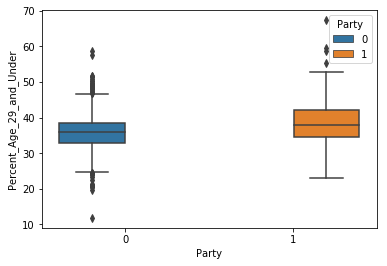

In [47]:
sns.boxplot(x='Party', y='Percent_Age_29_and_Under', hue='Party', data=merged_data)

**Conclusion**: We observe that the median 'Percent_Age_29_and_Under' is roughly the same for Democratic counties and Republican counties.

### 'Percent_Age_65_and_Older'

In [48]:
merged_data.groupby(['Party'])['Percent_Age_65_and_Older'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,875.0,18.814997,4.733641,6.954387,15.781389,18.377039,21.109296,37.622759
1,325.0,16.194826,4.282422,6.653188,13.106233,15.698087,18.806426,31.642106


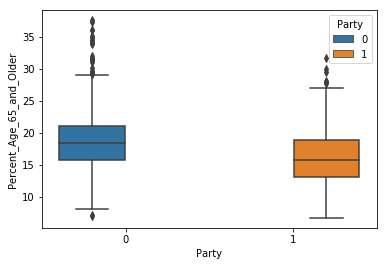

In [49]:
sns.boxplot(x='Party', y='Percent_Age_65_and_Older', hue='Party', data=merged_data)

**Conclusion**: We observe that the median 'Percent_Age_65_and_Older' is higher for Republican counties.

## Descriptive statistics for gender

### 'Percent_Female'

In [50]:
merged_data.groupby(['Party'])['Percent_Female'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,875.0,49.617156,2.447883,21.513413,49.207916,50.174456,50.827181,55.885023
1,325.0,50.385433,2.149359,34.245291,49.854280,50.653830,51.492075,56.418468


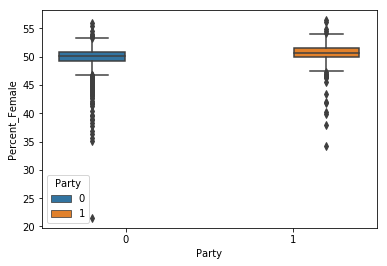

In [51]:
sns.boxplot(x='Party', y='Percent_Female', hue='Party', data=merged_data)

**Conclusion**: We observe that the 'Percent_Female' is almost the same for Democratic counties and Republican counties.

## Descriptive statistics for race and ethnicity

### 'Percent_White_not_Hispanic_or_Latino'

In [52]:
merged_data.groupby(['Party'])['Percent_White_not_Hispanic_or_Latino'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,875.0,82.597026,16.134097,18.758977,74.960538,89.418396,94.468872,99.627329
1,325.0,69.683766,24.981502,2.776702,53.271579,77.786090,90.300749,98.063495


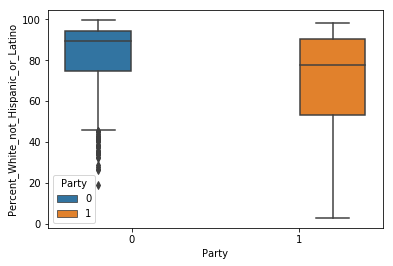

In [53]:
sns.boxplot(x='Party', y='Percent_White_not_Hispanic_or_Latino', hue='Party', data=merged_data)

**Conclusion**: We observe that the median 'Percent_White_not_Hispanic_or_Latino' is higer for Republican counties.

### 'Percent_Black_not_Hispanic_or_Latino'

In [54]:
merged_data.groupby(['Party'])['Percent_Black_not_Hispanic_or_Latino'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,875.0,4.182092,6.706383,0.0,0.460803,1.318775,4.750447,41.563041
1,325.0,9.242649,13.351340,0.0,0.839103,3.485992,11.058843,63.953279


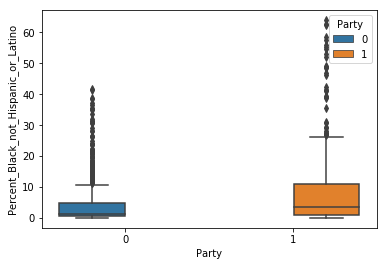

In [55]:
sns.boxplot(x='Party', y='Percent_Black_not_Hispanic_or_Latino', hue='Party', data=merged_data)

**Conclusion**: We observe that the median 'Percent_Black_not_Hispanic_or_Latino' is higher for Democratic counties.

### 'Percent_Hispanic_or_Latino'

In [56]:
merged_data.groupby(['Party'])['Percent_Hispanic_or_Latino'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,875.0,9.801825,14.144003,0.000000,1.704640,3.440794,10.785963,78.397012
1,325.0,12.587391,19.575030,0.193349,2.531017,5.039747,11.857116,95.479801


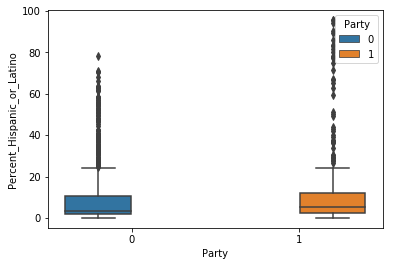

In [57]:
sns.boxplot(x='Party', y='Percent_Hispanic_or_Latino', hue='Party', data=merged_data)

**Conclusion**: We observe that the 'Percent_Hispanic_or_Latino' is roughly the same for Democratic counties and Republican counties.

## Descriptive statistics for education

### 'Percent_Less_than_High_School_Degree'

In [58]:
merged_data.groupby(['Party'])['Percent_Less_than_High_School_Degree'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,875.0,14.029195,6.319875,2.134454,9.666957,12.577108,17.489907,47.812773
1,325.0,11.883760,6.505613,3.215803,7.893714,10.370080,13.637059,49.673777


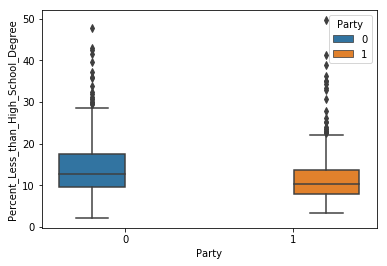

In [59]:
sns.boxplot(x='Party', y='Percent_Less_than_High_School_Degree', hue='Party', data=merged_data)

**Conclusion**: We observe that the median 'Percent_Less_than_High_School_Degree' is roughly the same for Democratic counties and Republican counties.

### 'Percent_Less_than_Bachelor's_Degree'

In [60]:
merged_data.groupby(['Party'])['Percent_Less_than_Bachelor\'s_Degree'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,875.0,81.103128,6.842667,43.41947,78.108767,82.409455,85.561291,97.014925
1,325.0,71.968225,11.192404,26.33544,65.711800,72.736143,79.903653,94.849957


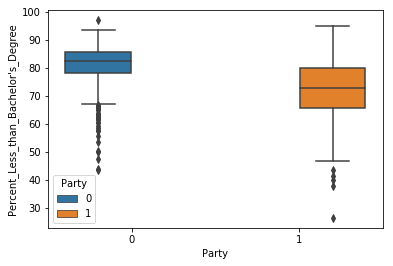

In [61]:
sns.boxplot(x='Party', y='Percent_Less_than_Bachelor\'s_Degree', hue='Party', data=merged_data)

**Conclusion**: We observe that the median 'Percent_Less_than_Bachelor's_Degree' is higher for Republican counties.

# Question 9

Features 'Percent_Age_65_and_Older', 'Percent_White_not_Hispanic_or_Latino', 'Percent_Black_not_Hispanic_or_Latino', 'Percent_Less_than_High_School_Degree' and 'Percent_Less_than_Bachelor's_Degree' seem to be more important to determine whether a county is labeled as Democratic or Republican.

# Question 10

In [62]:
import plotly.figure_factory as ff
fig = ff.create_choropleth(fips=merged_data['FIPS'], values=merged_data['Party'], colorscale=['#ff0000', '#0000FF'])
fig.layout.template = None
fig.show()

ModuleNotFoundError: No module named 'plotly'